In [0]:
import altair

In [0]:
import pandas as pd

In [0]:
brain_body=pd.read_csv('brain.csv')

In [0]:
brain_body.head()

,Index,Brain Weight,Body Weight
0,1,3.385,44.5
1,2,0.480,15.5
2,3,1.350,8.1
3,4,465.000,423.0
4,5,36.330,119.5


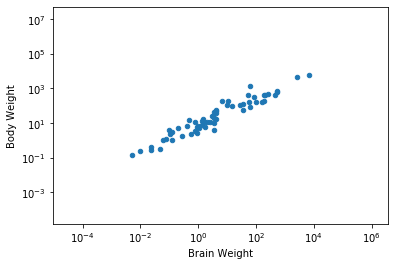

In [0]:
brain_body.plot('Brain Weight', 'Body Weight', kind='scatter', logx=True, logy=True)

In [0]:
altair.Chart(brain_body).mark_bar().encode(
    x=altair.X('Brain Weight', bin=True),
    y='count()'
)

alt.Chart(...)

In [0]:
graf1=altair.Chart(brain_body).mark_bar().encode(
    x=altair.X('Brain Weight', bin=True),
    y='count()'
)

In [0]:
graf2=altair.Chart(brain_body).mark_bar().encode(
    x=altair.X('Body Weight', bin=True),
    y='count()'
)

In [0]:
histo_body.save('my_graph.html')

In [0]:
graf1|graf2

alt.HConcatChart(...)

In [0]:
altair.Chart(brain_body).mark_circle().encode(
    x=altair.X('Body Weight', bin=True),
    y='count()'
)

alt.Chart(...)

In [0]:
altair.Chart(brain_body).mark_circle().encode(
    x=altair.X('Body Weight', bin=False),
    y=altair.X('Brain Weight', bin=False)
)

alt.Chart(...)

In [0]:
graf3=altair.Chart(brain_body).mark_circle().encode(
    x=altair.X('Body Weight', bin=altair.Bin(maxbins=20)),
    y='count()',
    color=altair.value('red')
).properties(
    width=860
)

graf3

alt.Chart(...)

In [0]:
((graf1|graf2)&graf3).save('brain_deshboard.html')

In [0]:
trends=pd.read_csv('google_trends.csv')

In [0]:
trends.head()

,date,search_term,value
0,2004-01,SPSS data,6
1,2004-02,SPSS data,8
2,2004-03,SPSS data,7
3,2004-04,SPSS data,7
4,2004-05,SPSS data,6


In [0]:
graftrend=altair.Chart(trends).mark_line().encode(
    x=altair.X('date:T', timeUnit='yearmonth'),
    y='mean(value)',
    color='search_term'
)

In [0]:
bartrend=altair.Chart(trends).mark_bar().encode(
    x='search_term',
    y='mean(value)',
    color='search_term'
)

In [0]:
(bartrend|graftrend).properties(
    title='Trends'
)

alt.HConcatChart(...)

In [0]:
seleccion=altair.selection_single(encodings=['x'])

graftrend=altair.Chart(trends).mark_line().encode(
    x=altair.X('date:T', timeUnit='yearmonth'),
    y='mean(value)',
    color='search_term'
).transform_filter(seleccion)

bartrend=altair.Chart(trends).mark_bar().encode(
    x='search_term',
    y='mean(value)',
    color='search_term'
).properties(
    selection=seleccion
)


(bartrend|graftrend).save('zoom.html')

In [0]:
seleccion=altair.selection_interval(encodings=['x'])

graftrend=altair.Chart(trends).mark_line().encode(
    x=altair.X('date:T', timeUnit='yearmonth'),
    y='mean(value)',
    color='search_term'
).transform_filter(
    seleccion
)

graftrend2=altair.Chart(trends).mark_line().encode(
    x=altair.X('date:T', timeUnit='yearmonth'),
    y='mean(value)',
    color='search_term'
).properties(
    selection=seleccion,
    height=100
)

(graftrend&graftrend2).save('selector.html')

alt.VConcatChart(...)

In [0]:
# life countries

In [0]:
lifecountries=pd.read_csv('lifecountries.csv')

In [0]:
lifecountries.head()

,Unnamed: 0,Country GDP,Life Expectancy,Description,size,Continent,country
0,0,6223.367465,72.301,Country: Algeria <br>Life Expectancy: 72.30...,33333216,Africa,Algeria
1,1,4797.231267,42.731,Country: Angola <br>Life Expectancy: 42.731...,12420476,Africa,Angola
2,2,1441.284873,56.728,Country: Benin <br>Life Expectancy: 56.728 ...,8078314,Africa,Benin
3,3,12569.851770,50.728,Country: Botswana <br>Life Expectancy: 50.7...,1639131,Africa,Botswana
4,4,1217.032994,52.295,Country: Burkina Faso <br>Life Expectancy: ...,14326203,Africa,Burkina Faso


In [0]:
altair.Chart(lifecountries).mark_circle().encode(
    x=altair.X('Country GDP', scale=altair.Scale(type='log')),
    y=altair.X('Life Expectancy'),
    size=altair.X('size', scale=altair.Scale(range=(50,5000))),
    color='Continent',
    tooltip='Country GDP'
).properties(
    title='Correlation between income and life expectancy',
    height=600,
    width=800
)

alt.Chart(...)

In [0]:
## SEGUNDA PARTE:

In [0]:
wt=pd.read_csv('worldTemperatures.csv', header=None)

In [0]:
wt.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,51957,IVM00065594,20160101,TAVG,28.3,H,NaN,S,NaN,SPY,4.746717,-6.660817,Ivory Coast,San Pedro
1,1,141546,IVM00065594,20160102,TAVG,27.9,H,NaN,S,NaN,SPY,4.746717,-6.660817,Ivory Coast,San Pedro
2,2,231680,IVM00065594,20160103,TAVG,26.8,H,NaN,S,NaN,SPY,4.746717,-6.660817,Ivory Coast,San Pedro
3,3,323605,IVM00065594,20160104,TAVG,27.6,H,NaN,S,NaN,SPY,4.746717,-6.660817,Ivory Coast,San Pedro
4,4,416249,IVM00065594,20160105,TAVG,27.2,H,NaN,S,NaN,SPY,4.746717,-6.660817,Ivory Coast,San Pedro


In [0]:
wt.columns=["0", "1", "2", "date", "4", 'temp', "6", "7", "8", "9", "10", 'latitude', 'longitude',
        'country','city']

In [0]:
from altair import pipe, limit_rows, to_values
t = lambda data: pipe(data, limit_rows(max_rows=30000), to_values)
altair.data_transformers.register('custom', t)
altair.data_transformers.enable('custom')

DataTransformerRegistry.enable('custom')

In [0]:
wt.dtypes

0              int64
1              int64
2             object
date           int64
4             object
temp         float64
6             object
7            float64
8             object
9            float64
10            object
latitude     float64
longitude    float64
country       object
city          object
dtype: object

In [0]:
wt_temp=wt.groupby('country').mean().reset_index()


altair.Chart(wt_temp).mark_bar().encode(
    x=altair.X('country:N', sort=altair.EncodingSortField('temp', op='mean', order='descending')),
    y='mean(temp)',
    tooltip='country:N'
)

# N: categoría, Q: número, T: tiempo

alt.Chart(...)

In [0]:
wt['date']=pd.to_datetime(wt['date'], format='%Y%m%d')

In [0]:
wt.head()

,0,1,2,date,4,temp,6,7,8,9,10,latitude,longitude,country,city
0,0,51957,IVM00065594,2016-01-01,TAVG,28.3,H,NaN,S,NaN,SPY,4.746717,-6.660817,Ivory Coast,San Pedro
1,1,141546,IVM00065594,2016-01-02,TAVG,27.9,H,NaN,S,NaN,SPY,4.746717,-6.660817,Ivory Coast,San Pedro
2,2,231680,IVM00065594,2016-01-03,TAVG,26.8,H,NaN,S,NaN,SPY,4.746717,-6.660817,Ivory Coast,San Pedro
3,3,323605,IVM00065594,2016-01-04,TAVG,27.6,H,NaN,S,NaN,SPY,4.746717,-6.660817,Ivory Coast,San Pedro
4,4,416249,IVM00065594,2016-01-05,TAVG,27.2,H,NaN,S,NaN,SPY,4.746717,-6.660817,Ivory Coast,San Pedro


In [0]:
wt_temp=wt.groupby('date').mean().reset_index()

altair.Chart(wt_temp).mark_line().encode(
    x=altair.X('date:T'),
    y='temp',
    tooltip='date:T'
).properties(
    width=600
)

alt.Chart(...)

In [0]:
selector=['Spain','Austria', 'Portugal', 'Switzerland']

wt_temp=wt.groupby(['date','country']).mean().reset_index()

altair.Chart(wt_temp[wt_temp['country'].isin(selector)]).mark_line().encode(
    x=altair.X('date:T'),
    y='temp',
    color='country',
    tooltip='date:T'
).properties(
    width=600
)

alt.Chart(...)

In [0]:
wt_temp=wt.groupby(['latitude','longitude']).mean().reset_index()

data = altair.Chart(wt_temp).mark_circle().encode(
    latitude='latitude',
    longitude='longitude',
    color=altair.Color('mean(temp)', scale=altair.Scale(range=['yellow','red']))
).properties(
    height=800,
    width=800
)
data

alt.Chart(...)

In [0]:
url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"
countries = altair.Data(url=url,
                        format=altair.DataFormat(property="features",type="json")
                        )

In [0]:
mapa = altair.Chart(countries).mark_geoshape(
    fill='lightgray'
).properties(
    height=800,
    width=800
)

In [0]:
mapa+data

alt.LayerChart(...)